# Sales Prediction

###Rosa Rocha

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Loading Data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sales_predictions.csv')
df.info()
df.head()
corr = df.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Data Cleaning

In [3]:
#Explore the data - what do you need to do to clean this data? Clean it!

df.shape

(8523, 12)

In [4]:

df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df.isna().sum() / len(df) * 100
     

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [8]:
plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])

<ipython-input-8-9109d13ca073>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])
<ipython-input-8-9109d13ca073>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])


In [9]:
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

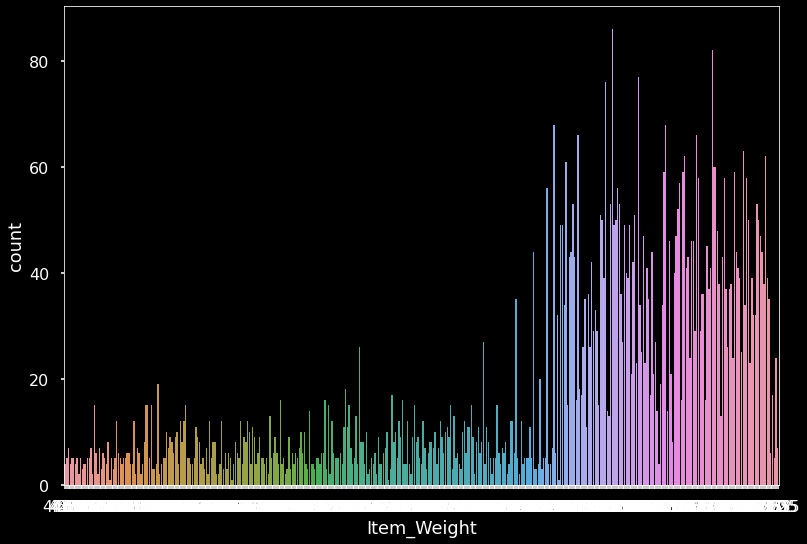

In [10]:
ax = sns.countplot(data = df, x = 'Item_Weight');

* For this column I chose to use the median for the missing values because weight is considered continous data type.

In [11]:
mean_age = df['Item_Weight'].median()
print(mean_age)



12.6


In [12]:
df['Item_Weight'] = df['Item_Weight'].fillna(value = '12.6')

df['Item_Weight'].value_counts()

12.6     1463
12.15      86
17.6       82
13.65      77
11.8       76
         ... 
7.275       2
7.685       1
9.42        1
6.52        1
5.4         1
Name: Item_Weight, Length: 416, dtype: int64

In [13]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

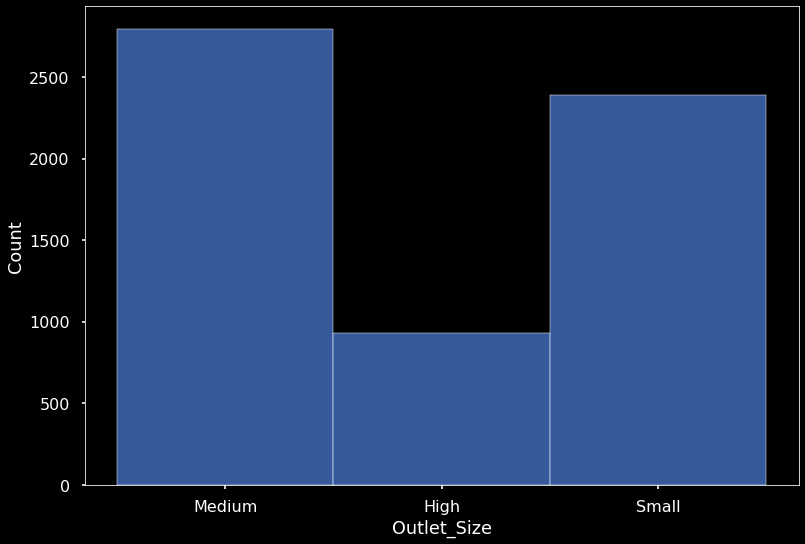

In [14]:
ax = sns.histplot(data = df, x = 'Outlet_Size')

* For this column I chose to use unknown for the missing values since this is categorical ordinal data type. I felt like using mode would provide inaccurate information. 

In [15]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(value = 'Unknown')
df['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [16]:
df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   object 
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 799.2+ KB


In [17]:
pd.set_option('display.max_rows', None)
#df['Item_Weight'].value_counts()
     

* Commented last item ^ 

In [18]:
df['Item_Weight'] = df['Item_Weight'].astype('float')
#print(df['Item_Weight'])

* commented ^ print 

In [19]:

data_types = df.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [20]:

for col in str_cols:
    print(f'- {col}:')
    #print(df[col].value_counts(dropna=False))
    #print("\n\n")

- Item_Identifier:
- Item_Fat_Content:
- Item_Type:
- Outlet_Identifier:
- Outlet_Size:
- Outlet_Location_Type:
- Outlet_Type:


In [21]:
Fat_Content = {'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'}
#print(Fat_Content)

#df['Item_fat_Content'] = df['Item_Fat_Content'].replace(Fat_Content)
new_Item_Fat_Content = df['Item_Fat_Content'].replace(['LF','low fat','reg'], ['Low Fat','Low Fat', 'Regular'])
#df['Item_Fat_Content'].replace(['LF','low fat','reg'], ['Low Fat','Low Fat', 'Regular'])
#print(df['Item_fat_Content'])
#df['Item_fat_Content'].head()
#print(new_Item_Fat_Content)

In [22]:
new_Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [23]:
#df.describe().round(2)

stats =  df.describe()
stats.loc[['mean','min','max']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
min,4.55500,0.000000,31.290000,1985.000000,33.290000
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Visuals

Text(0, 0.5, 'Items')

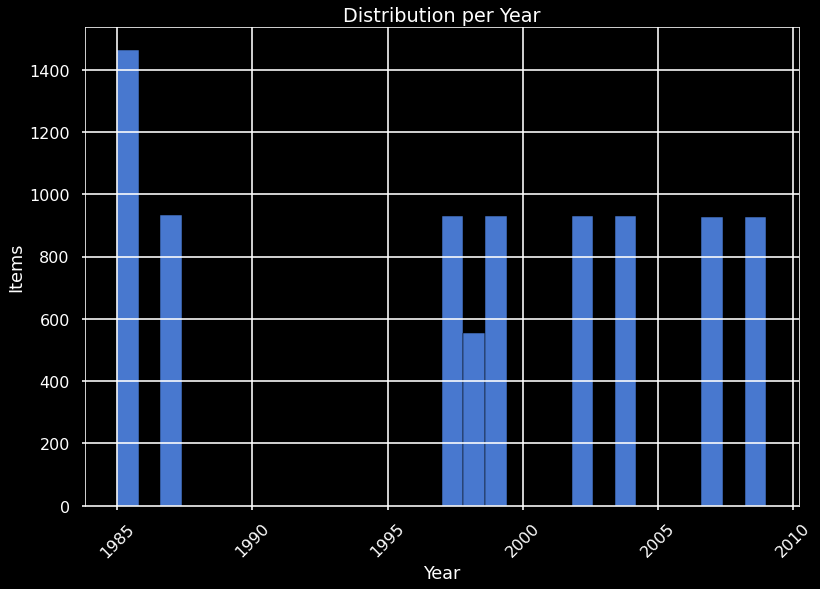

In [24]:
#Histogram
ax = df['Outlet_Establishment_Year'].hist(bins = 30, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 45)
ax.ticklabel_format(style='plain')
ax.set_title('Distribution per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Items')



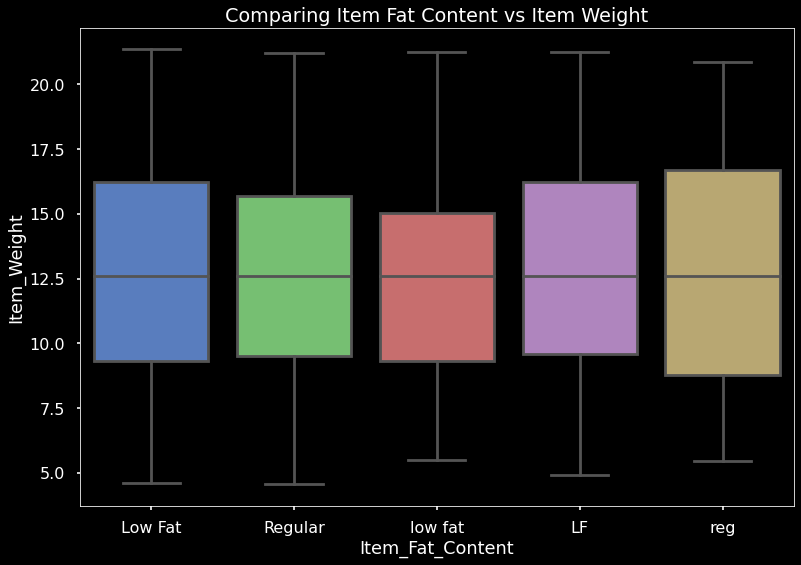

In [25]:
ax = sns.boxplot(x='Item_Fat_Content', y='Item_Weight', data=df)
ax.set_title("Comparing Item Fat Content vs Item Weight");


<Axes: >

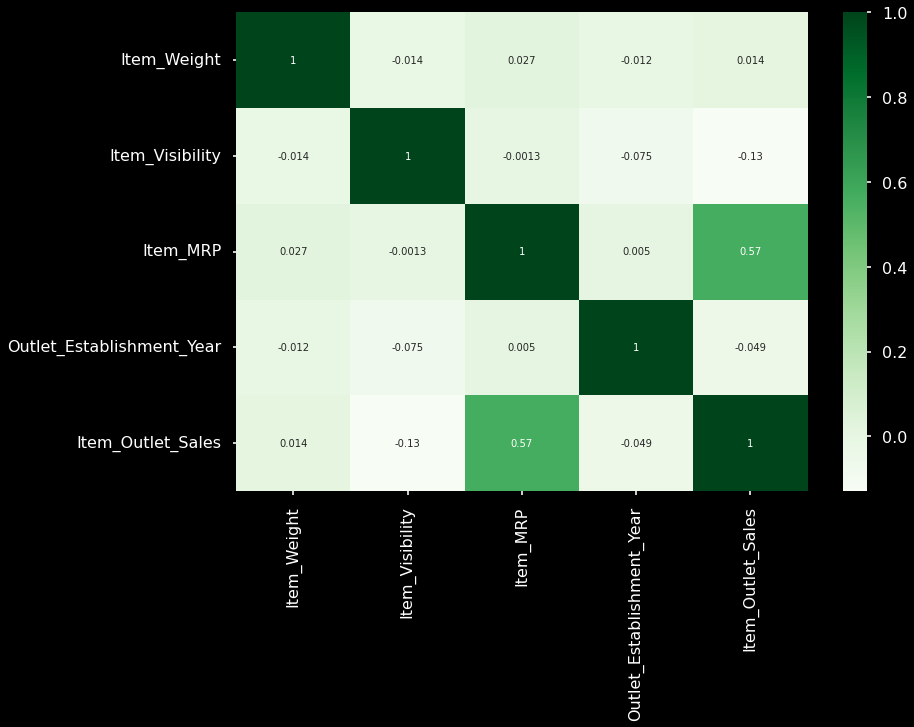

In [26]:
sns.heatmap(corr, cmap = 'Greens', annot = True)

## Explanatory Visuals

In [27]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [28]:
means = df.groupby(['Item_Type'])['Item_Outlet_Sales'].mean().sort_values(ascending=False)
means

Item_Type
Starchy Foods            2374.332773
Seafood                  2326.065928
Fruits and Vegetables    2289.009592
Snack Foods              2277.321739
Household                2258.784300
Dairy                    2232.542597
Canned                   2225.194904
Breads                   2204.132226
Meat                     2158.977911
Hard Drinks              2139.221622
Frozen Foods             2132.867744
Breakfast                2111.808651
Health and Hygiene       2010.000265
Soft Drinks              2006.511735
Baking Goods             1952.971207
Others                   1926.139702
Name: Item_Outlet_Sales, dtype: float64

<ipython-input-29-76a1cff0f3d1>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df,x='Item_Type', y = 'Item_Outlet_Sales', order = means.index, ci = None)


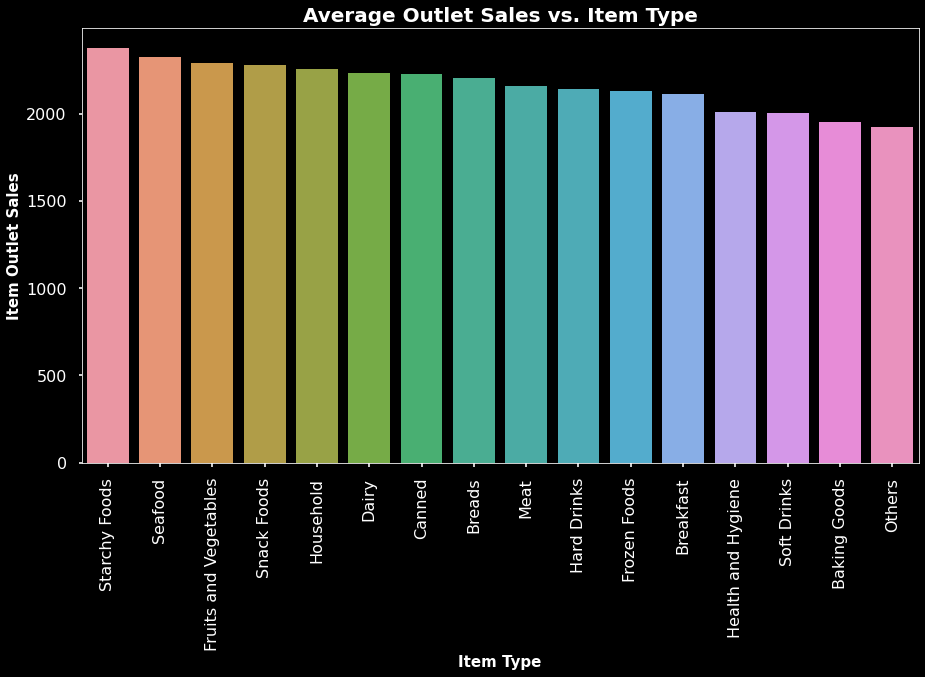

In [29]:
#Which Itemp Type is sold the most and least?
fig, ax = plt.subplots(figsize=(15,8))

ax = sns.barplot(data=df,x='Item_Type', y = 'Item_Outlet_Sales', order = means.index, ci = None)
plt.xticks(rotation = 90)
ax.set_title('Average Outlet Sales vs. Item Type', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Item Type', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Item Outlet Sales', fontsize = 15, fontweight = 'bold');

In [39]:
df.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [59]:
df.groupby(['Outlet_Type'])['Item_Outlet_Sales'].mean().sort_values(ascending=False)

Outlet_Type
Supermarket Type3    3694.038558
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Grocery Store         339.828500
Name: Item_Outlet_Sales, dtype: float64

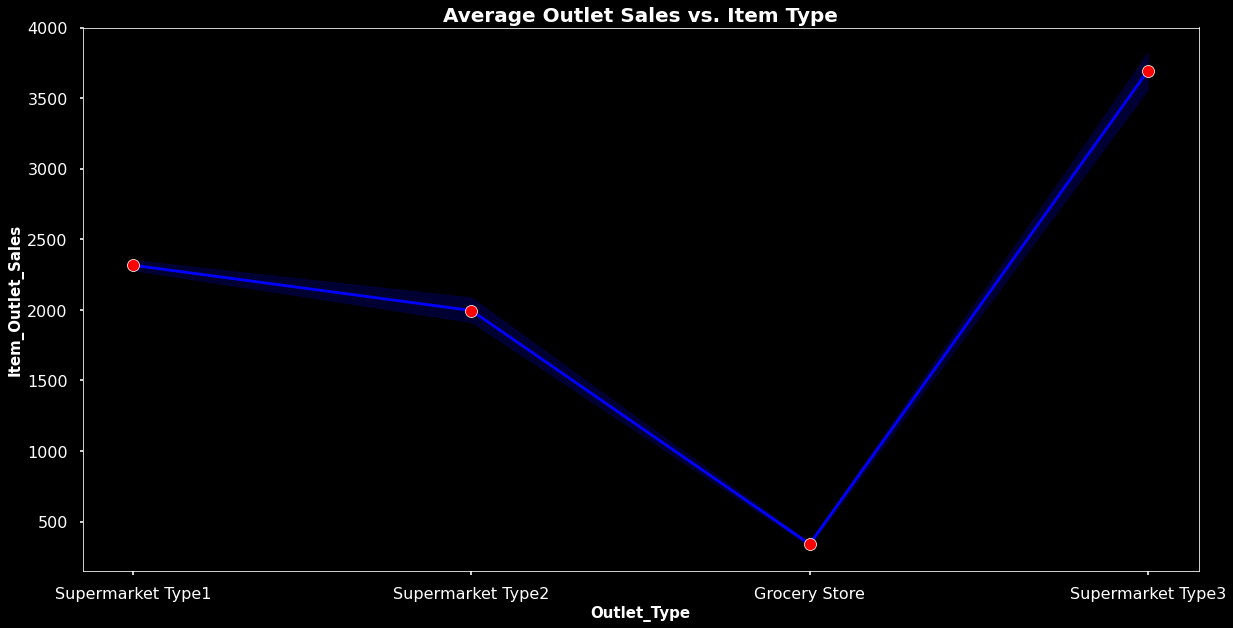

In [82]:
#Line plot shows supermarket type 3 has the most sales and grocery store has the least sales
fig, ax = plt.subplots(figsize=(20,10))

ax_new = sns.lineplot(data=df,x = 'Outlet_Type', y = 'Item_Outlet_Sales',  color = 'blue', linestyle = 'solid', marker = 'o',markerfacecolor = 'red', markersize = 12)

ax_new.set_title('', fontsize = 20, fontweight = 'bold');


#ax.set_xticklabels(labels)
#plt.locator_params(axis='x', nbins=4)

ax_new.set_title('Average Outlet Sales vs. Item Type', fontsize = 20, fontweight = 'bold');
ax_new.set_xlabel('Outlet_Type', fontsize = 15, fontweight = 'bold')
ax_new.set_ylabel(f'Item_Outlet_Sales', fontsize = 15, fontweight = 'bold');
